# What are we querying?

The `bigquery-samples.wikipedia_benchmark.Wiki100B` table contains the number of views to various Wikipedia pages between Jan-Sept 2010 and the language of those pages

It contains about 6.8 TB of data.

In [22]:
library(bigrquery)
project_id <- 'nvidiagtc' 

pt <- proc.time()

# What were the nine most popular languges every month?
sql <- "SELECT year, month, language, million_views 
        FROM (
          SELECT 
            year,
            month,
            language,
            sum(views)/pow(10,6) as million_views,
            ROW_NUMBER() OVER (PARTITION BY month ORDER BY SUM(views) DESC) AS lang_popularity
          FROM `bigquery-samples.wikipedia_benchmark.Wiki100B`
          GROUP by year, month, language
        )
        WHERE lang_popularity <= 9
        ORDER by  year, month, lang_popularity, million_views DESC"

tb <- bq_project_query(project_id, sql)
df <- bq_table_download(tb)

elapsed_time <- (proc.time() - pt)[["elapsed"]]
cat("\nElapsed time = ", elapsed_time, " seconds\n\n")

df

Auto-refreshing stale OAuth token.



Elapsed time =  1.516  seconds



year,month,language,million_views
<int>,<int>,<chr>,<dbl>
2010,1,en,49902.369
2010,1,ja,9072.945
2010,1,de,7868.540
2010,1,es,5158.397
2010,1,fr,4808.308
2010,1,ru,3244.086
2010,1,it,3041.609
2010,1,pl,2833.172
2010,1,commons,2049.160


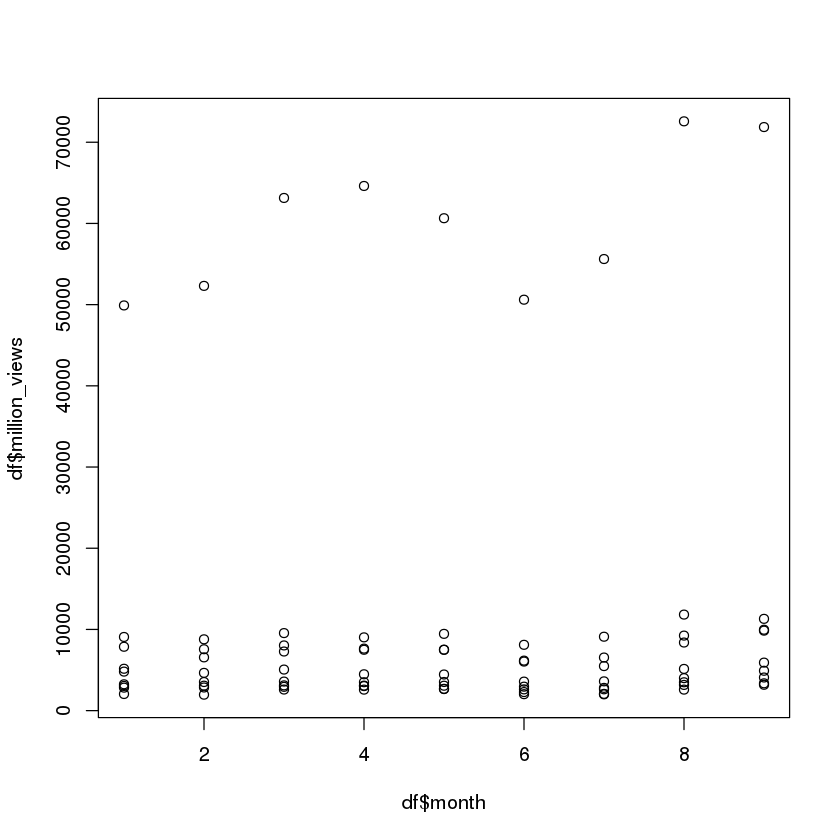

In [23]:
plot(x=df$month, y=df$million_views)
